## Dense Optical Flow

We show how optical flow can be applied to different points in the video

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [52]:
def extract_frames(fname,nframes=15,reduce_factor=2):
    cap = cv2.VideoCapture(fname)

    cframes = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    source_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    source_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    target_width = source_width // reduce_factor
    target_height = source_height // reduce_factor
    skip_frames = cframes // nframes - 1

    def convert(frame):
        frm = cv2.resize(frame,(target_width,target_height))
        return frm, cv2.cvtColor(frm, cv2.COLOR_BGR2GRAY)
    
    ret, frame = cap.read()
    frm,gray=convert(frame)

    # Create the HSV color image
    hsvImg = np.zeros_like(frm)
    hsvImg[..., 1] = 255

    frames = []
    flows = []
    
    # Play until the user decides to stop
    for i in range(nframes):
        # Save the previous frame data
        previousGray = gray
        ret, frame = cap.read()
        frm,gray = convert(frame)

        # Calculate the dense optical flow
        flow = cv2.calcOpticalFlowFarneback(previousGray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        # Obtain the flow magnitude and direction angle
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        # Update the color image
        hsvImg[..., 0] = 0.5 * ang * 180 / np.pi
        hsvImg[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        rgbImg = cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)

        #cv2.imwrite('c:/temp/opt/orig{}.png'.format(i),frm)
        #cv2.imwrite('c:/temp/opt/opt{}.png'.format(i), rgbImg)

        frames.append(frm)
        flows.append(rgbImg)

        # Display the resulting frame
        #cv2.imshow('dense optical flow', np.hstack((frame, rgbImg)))
        #cv2.imshow('dense optical flow',rgbImg)

        j=skip_frames
        while ret and (j>0):
            ret, _ = cap.read()
            j-=1

    # When everything is done, release the capture and close all windows
    cap.release()
    return zip(frames,flows)

In [53]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [55]:
def plot_frames(f):
    for (frm,flw) in f:
        plt.figure(figsize=(10,10))
        plt.imshow(np.hstack([frm,flw]))
        plt.show()

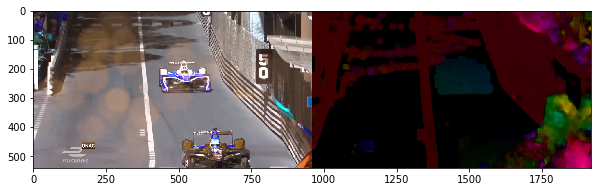

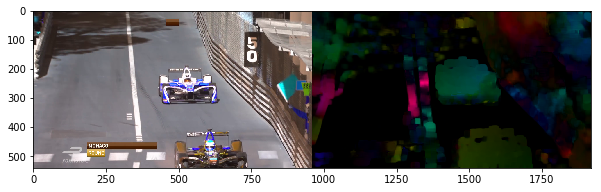

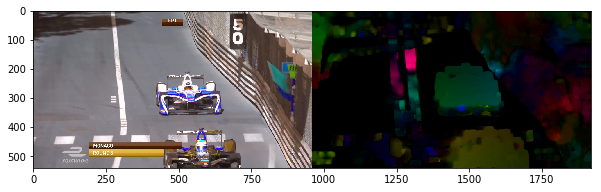

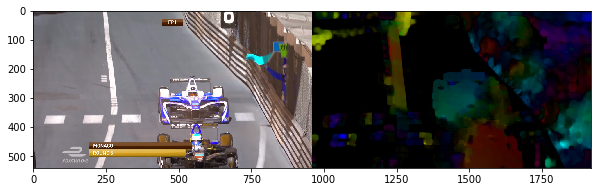

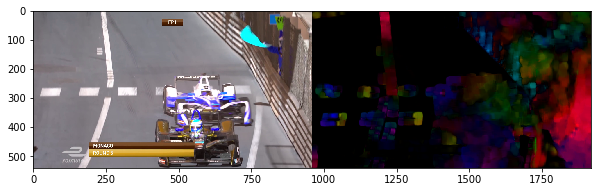

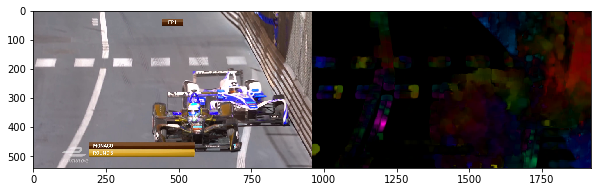

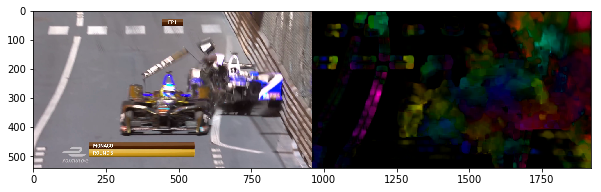

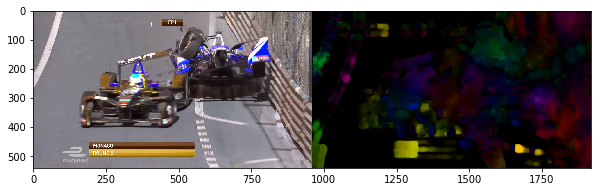

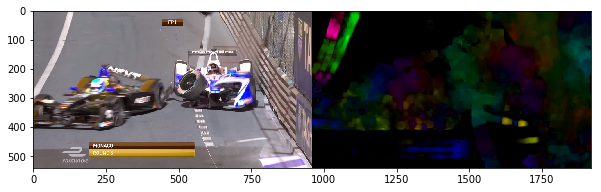

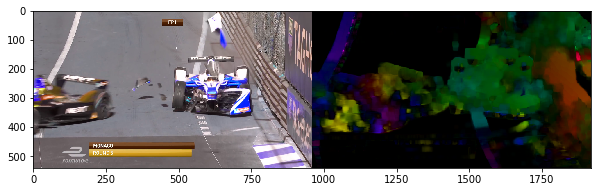

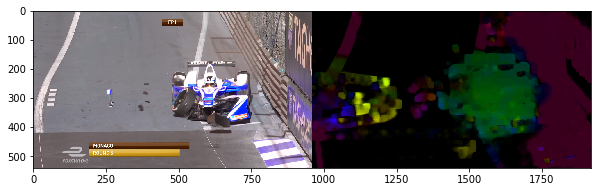

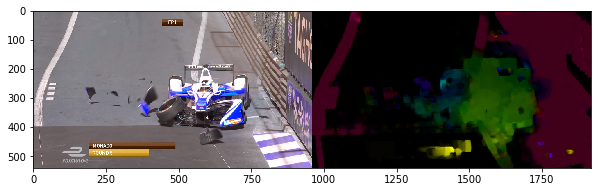

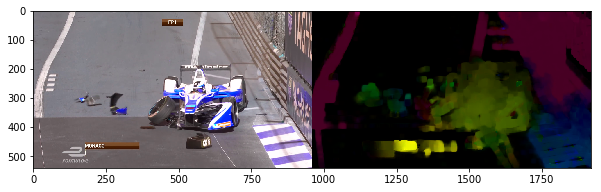

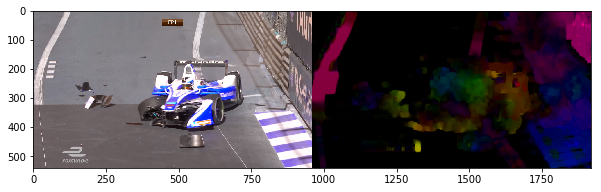

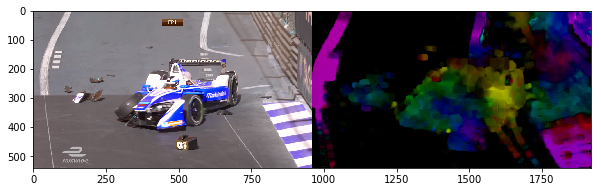

In [56]:
plot_frames(extract_frames('d:/data/collisions/output037-26961.mp4'))

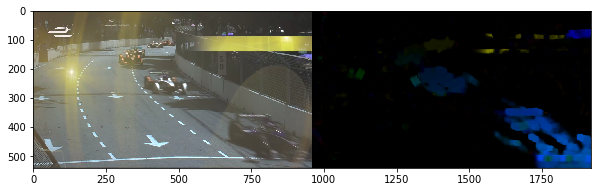

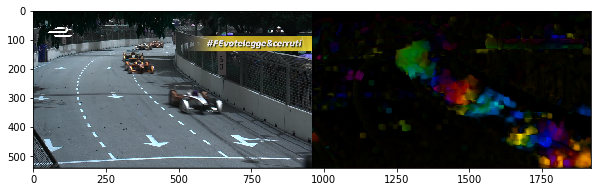

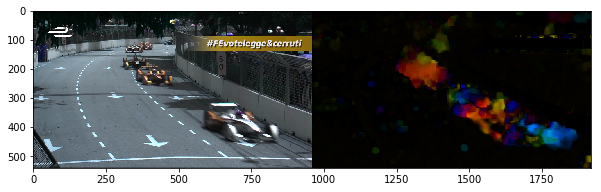

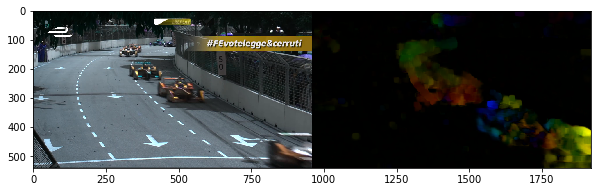

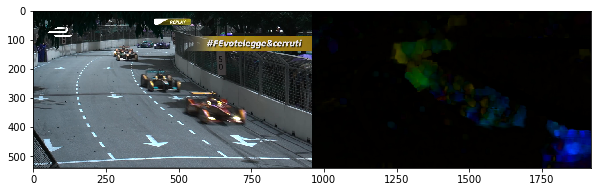

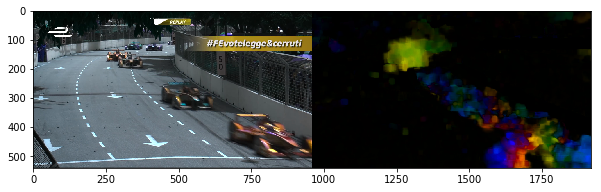

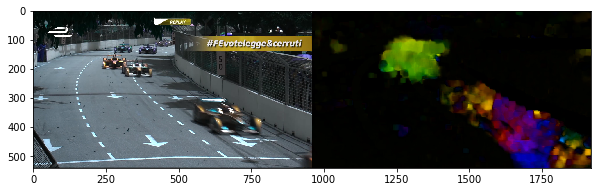

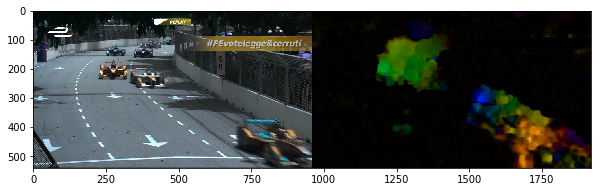

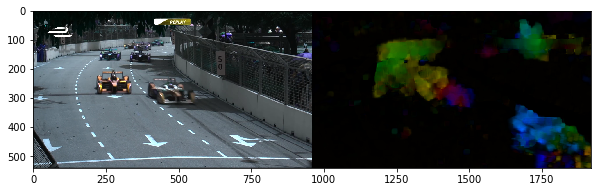

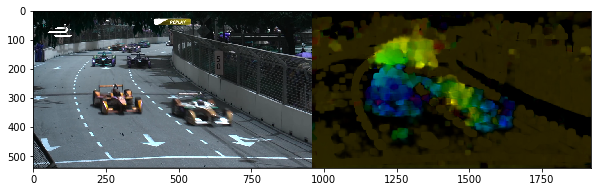

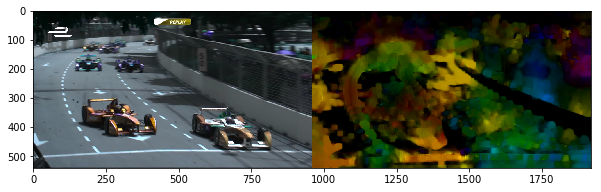

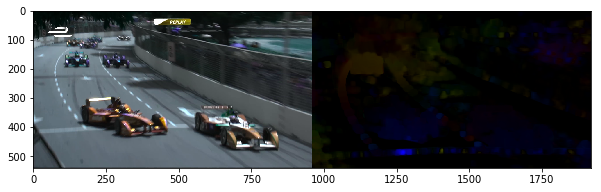

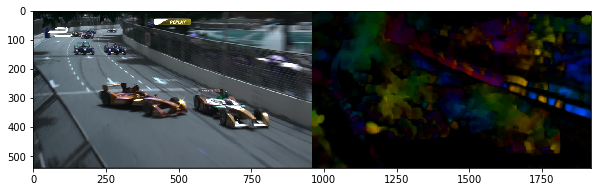

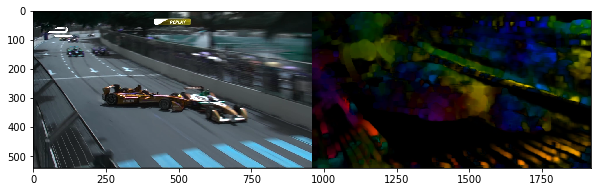

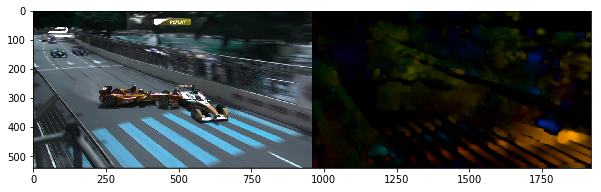

In [58]:
plot_frames(extract_frames('d:/data/collisions/output002-27378.mp4'))

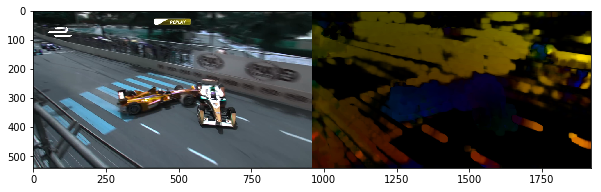

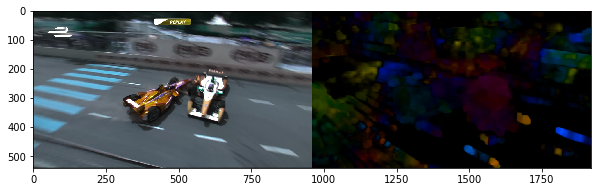

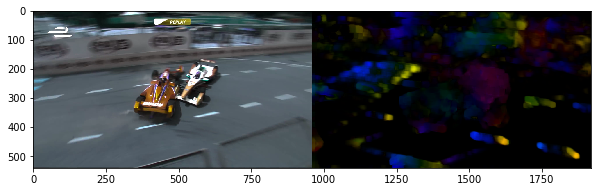

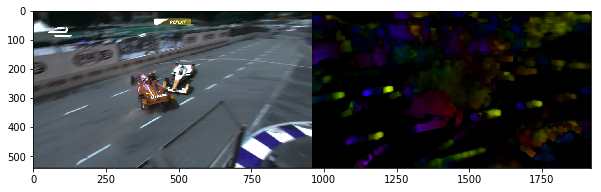

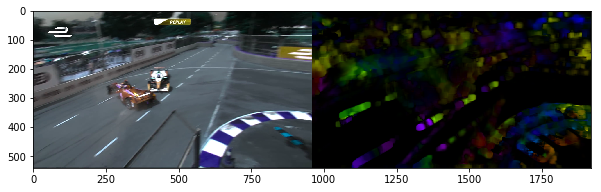

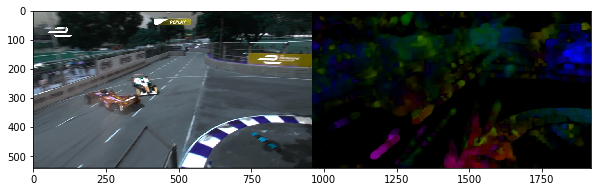

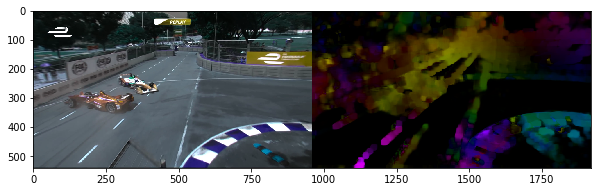

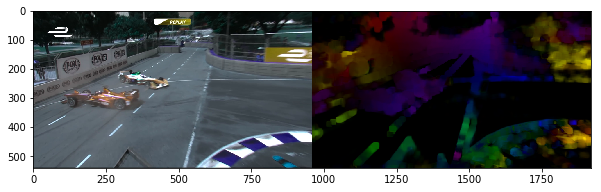

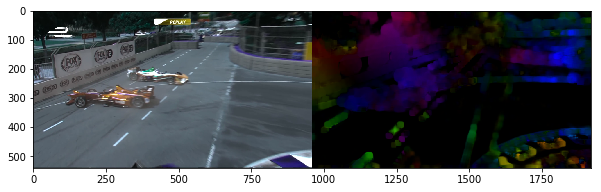

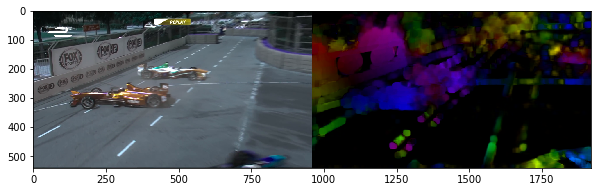

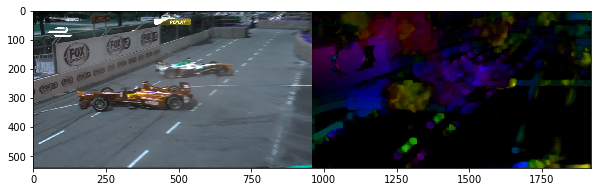

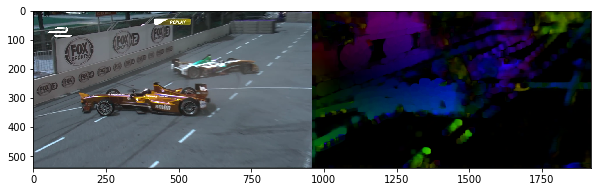

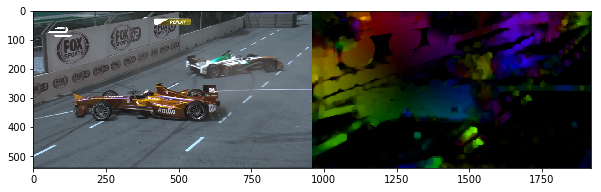

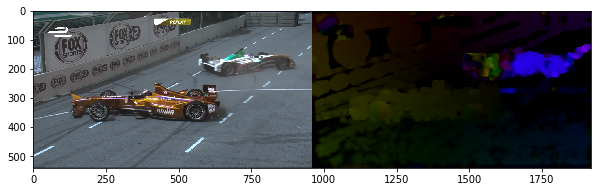

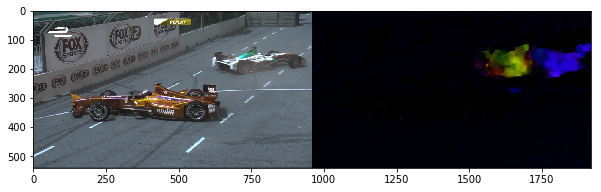

In [59]:
plot_frames(extract_frames('d:/data/collisions/output003-27378.mp4')) # Rotating

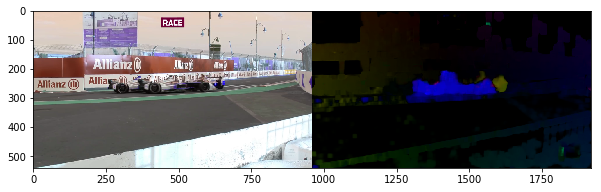

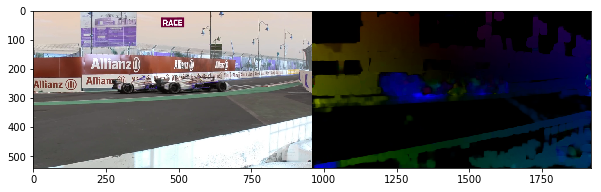

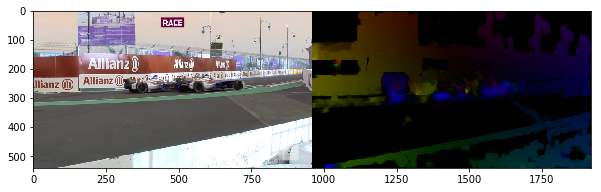

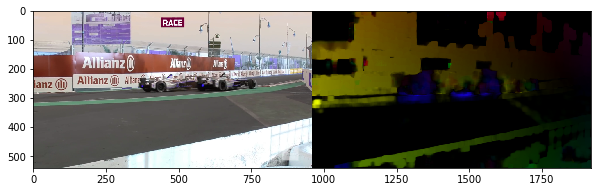

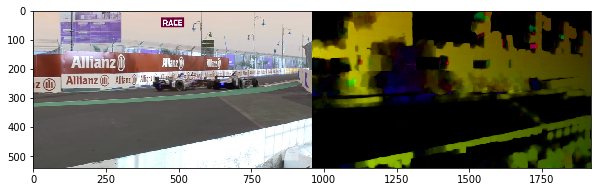

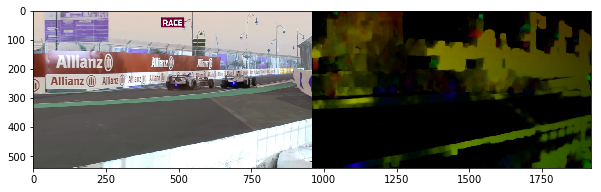

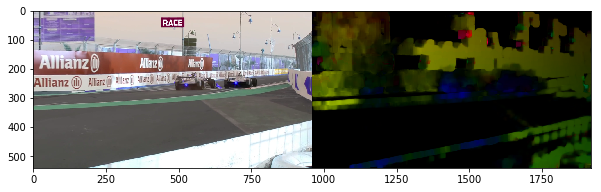

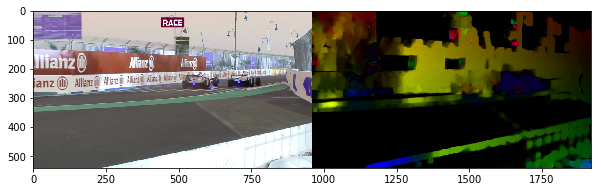

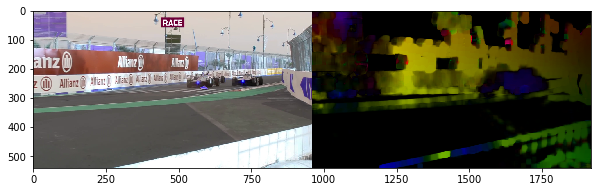

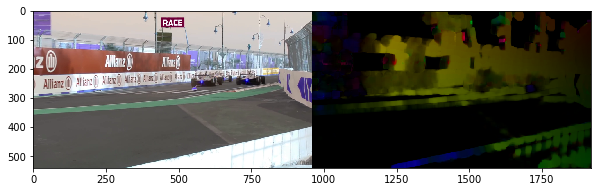

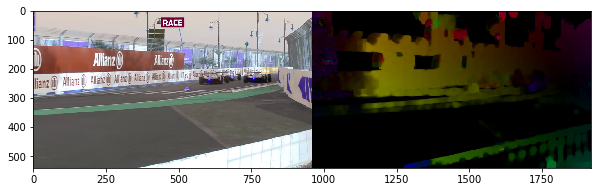

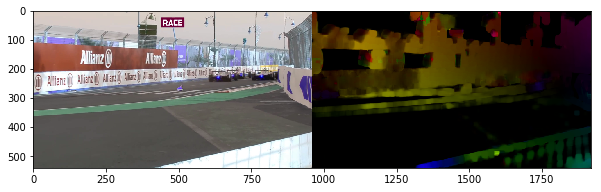

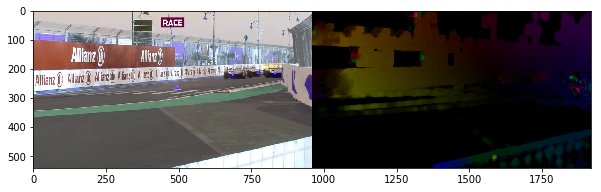

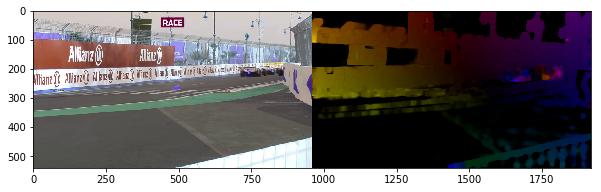

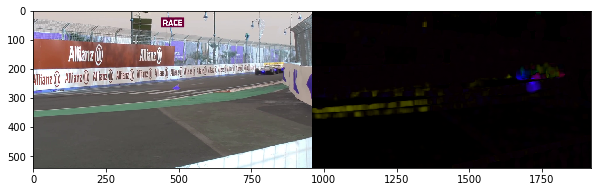

In [57]:
plot_frames(extract_frames('d:/data/not-collisions/output021.mp4')) # No collisio